## Scrap notebook with random functions and code just to get started on the entire NLP Process

In [1]:
#Importing necessary packages and libraries
import twint
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jeffreyng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeffreyng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#necessary packages
from nltk.tokenize import RegexpTokenizer
import re

In [146]:
#scraped CSV into dataframe
df=pd.read_csv('jeff.csv')
df.shape

(7137, 35)

In [155]:
#time period of tweets
df=data
data[['date', 'time']]

,date,time
0,2020-07-18,12:17:16
1,2020-07-18,12:17:13
2,2020-07-18,12:16:57
3,2020-07-18,12:16:26
4,2020-07-18,12:16:21
...,...,...
7132,2020-07-17,20:31:17
7133,2020-07-17,20:30:51
7134,2020-07-17,20:30:46
7135,2020-07-17,20:30:35


### Scrap Work and Used code 

In [5]:
#creating word bank from tweets
BoW=[]
for word in data['tweet']:
    BoW.append(word)
len(BoW)

7137

In [6]:
#further processing of BoW into a corpus
word_bank= ' '.join(BoW)
word_bank= word_bank.lower()
word_bank

' https://twitter.com/drawandstrike/status/1279805238556397569?s=19\xa0…\n\nlet me know when blm marxist scum is marching for this little girl and the 6000+ black people murdered by other black people in the us every year. till then... #alllivesmatter racism is the idol that feeds the  beast of #blacklivesmatter\nrev 13:17\n\n#alllivesmatter or no life does. powerful picture of the real state of race relations in america. #alllivesmatter \ngod bless these heroes! ✝️🇺🇸  https://twitter.com/pasreport/status/1284219448250048513\xa0… looks like yet another black criminal dealt with in the harsh manner they deserve #alllivesmatter i saw you on the news, know the truth and your response will bring a just consequence!! i own the copyrighted sermon, where the system of matter movements/lives matter generated!\n#alllivesmatter © & #blacklivesmatter© are my sentences..hijacked, sold & prostituted! #blm© is holy! how abt u go away. there r other dr\'s that disagree. so u appear 2 have the same"go

In [7]:
#looking at sample tweet
data['tweet'][9]

'So basically you are funding the militarization of BLM and Aintifa\nTake your money out of @BankofAmerica. \n#TheGreatAwakening #TheStormIsUponUs #AllLivesMatter  https://twitter.com/BofA_News/status/1267788917660516354\xa0…'

In [8]:
#tokenizing our word bank
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_tweets= tokenizer.tokenize(word_bank)

In [9]:
#our tokens
tokenized_tweets

['https',
 'twitter',
 'com',
 'drawandstrike',
 'status',
 's',
 'let',
 'me',
 'know',
 'when',
 'blm',
 'marxist',
 'scum',
 'is',
 'marching',
 'for',
 'this',
 'little',
 'girl',
 'and',
 'the',
 'black',
 'people',
 'murdered',
 'by',
 'other',
 'black',
 'people',
 'in',
 'the',
 'us',
 'every',
 'year',
 'till',
 'then',
 'alllivesmatter',
 'racism',
 'is',
 'the',
 'idol',
 'that',
 'feeds',
 'the',
 'beast',
 'of',
 'blacklivesmatter',
 'rev',
 'alllivesmatter',
 'or',
 'no',
 'life',
 'does',
 'powerful',
 'picture',
 'of',
 'the',
 'real',
 'state',
 'of',
 'race',
 'relations',
 'in',
 'america',
 'alllivesmatter',
 'god',
 'bless',
 'these',
 'heroes',
 'https',
 'twitter',
 'com',
 'pasreport',
 'status',
 'looks',
 'like',
 'yet',
 'another',
 'black',
 'criminal',
 'dealt',
 'with',
 'in',
 'the',
 'harsh',
 'manner',
 'they',
 'deserve',
 'alllivesmatter',
 'i',
 'saw',
 'you',
 'on',
 'the',
 'news',
 'know',
 'the',
 'truth',
 'and',
 'your',
 'response',
 'will',
 

In [10]:
#creating stop words to filter our word bank
import string
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—']
sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', 'alllivesmatter' , 
            'blacklivesmatter' , 'bluelivesmatter']
sw_set = set(sw_list)

In [11]:
#list of stopwords and punctuation
print(sw_set)

{'yourselves', 'aren', '(', 'just', 'blacklivesmatter', 'because', 'if', 'he', 'or', '-', "haven't", ';', 'doing', 'shan', 'won', 'can', '.', '–', "don't", '""', 've', 'being', '\\', 'been', 'any', 'its', 'me', 'y', 'until', 'some', "mustn't", 'between', "should've", 'no', 'why', 'said', '}', 'few', 'again', '$', '^', 'but', 'while', 'twitter', 'themselves', "you've", 'wasn', 'one', 'their', "it's", 'the', 'own', 'what', 'above', 'below', 'on', 'doesn', 'com', 'weren', "didn't", "weren't", 'further', '+', '...', '_', 'during', 'are', 'to', 'those', 'o', 'myself', 'bluelivesmatter', 'and', '’', 'mustn', 'm', '"', 'this', 'off', 'your', 'haven', 'an', '~', 'itself', 'it', 'by', 'ma', 'mightn', "won't", 'isn', "wasn't", 'be', 'were', 'needn', '&', 'with', 'hers', 'down', "doesn't", 'then', "you'll", '”', 'same', 'herself', '/', 'of', 'we', '=', '>', "'", '—', 'couldn', 'wouldn', "you're", "shan't", '‘', 'ours', 'once', 's', 'yours', "mightn't", 'both', 'his', '@', 'himself', 'about', 'ain

In [12]:
#filtering for stop words
filtered_tweets=[]
for word in tokenized_tweets:
    if word not in sw_set:
        filtered_tweets.append(word)
      

In [13]:
#lemmatizing
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
lemmatized_tweets=[]
for w in filtered_tweets:
    lemmatized_tweets.append(lemmatizer.lemmatize(w))
print (lemmatized_tweets)

['drawandstrike', 'status', 'let', 'know', 'blm', 'marxist', 'scum', 'marching', 'little', 'girl', 'black', 'people', 'murdered', 'black', 'people', 'u', 'every', 'year', 'till', 'racism', 'idol', 'feed', 'beast', 'rev', 'life', 'powerful', 'picture', 'real', 'state', 'race', 'relation', 'america', 'god', 'bless', 'hero', 'pasreport', 'status', 'look', 'like', 'yet', 'another', 'black', 'criminal', 'dealt', 'harsh', 'manner', 'deserve', 'saw', 'news', 'know', 'truth', 'response', 'bring', 'consequence', 'copyrighted', 'sermon', 'system', 'matter', 'movement', 'life', 'matter', 'generated', 'sentence', 'hijacked', 'sold', 'prostituted', 'blm', 'holy', 'abt', 'u', 'go', 'away', 'r', 'dr', 'disagree', 'u', 'appear', 'god', 'complex', 'dr', 'doom', 'fauci', 'listen', 'else', 'ur', 'lying', 'discredit', 'w', 'statement', 'diatribe', 'make', 'political', 'full', 'racism', 'simple', 'amazing', 'people', 'able', 'see', 'hypocrisy', 'wwg', 'wga', 'trump', 'nypost', 'blm', 'co', 'founder', 'desc

In [14]:
#observing the frequency of common words in the corpus
word_freq= pd.DataFrame(lemmatized_tweets)
word_freq[0].value_counts().head(50)

status                 1908
pic                    1260
life                    969
black                   860
blm                     840
matter                  727
people                  667
trump                   650
realdonaldtrump         491
racist                  458
white                   398
police                  378
news                    353
get                     333
backtheblue             316
u                       295
maga                    269
facebook                261
america                 257
right                   254
cspanwj                 247
like                    246
say                     243
hate                    236
breakingnews            230
savethechildren         222
love                    222
support                 221
want                    221
know                    209
stop                    202
breaking                200
de                      199
racism                  189
let                     187
would               

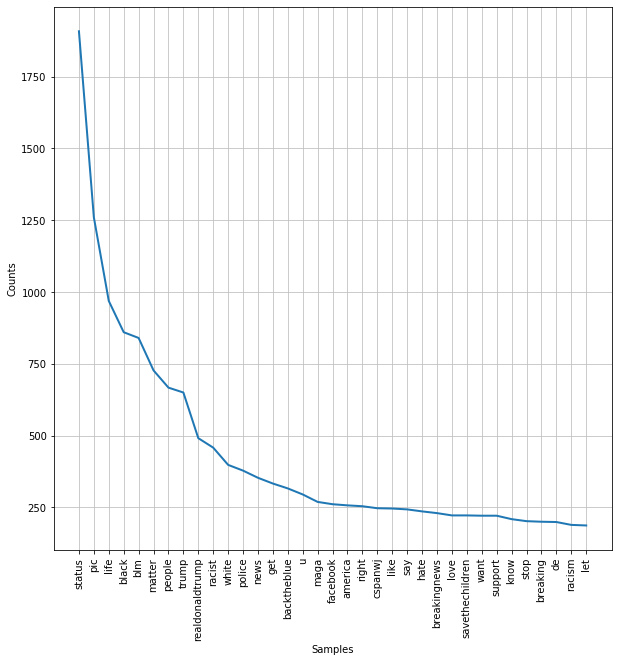

In [15]:
#observing the frequency distribution of popular words in corpus
fdist=FreqDist(lemmatized_tweets)
plt.figure(figsize=(10,10))
fdist.plot(35)

In [100]:
#vectorizing using the frequent words 
vec=CountVectorizer(stop_words=sw_set, ngram_range=(1,3))
X=vec.fit(lemmatized_tweets)
X=vec.transform(lemmatized_tweets)

In [102]:
#putting vectorized data into a dataframe
df_wordvec = pd.DataFrame(X.todense(), columns = vec.get_feature_names())
df_wordvec

,aaj,aajtak,aan,aandacht,aangeven,aaru,aau,ab,abbyjohnson,abcnews,...,zvg,zw,zwarte,zwarten,zwartepiet,zweifelhaften,zxt,zyada,zyrbhhbmw,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#a look at all of the tweets
data['tweet']

0        https://twitter.com/drawandstrike/status/1279...
1       RACISM IS THE IDOL THAT FEEDS THE  BEAST OF #b...
2       Powerful picture of the REAL state of race rel...
3       Looks like yet another black criminal dealt wi...
4       I SAW YOU ON THE NEWS, KNOW THE TRUTH AND YOUR...
                              ...                        
7132    #AllLivesMatter #BlueLivesMatter and #OurCount...
7133    @ericgarcetti  what did you expect moron? we'r...
7134    Does that mean #DementiaJoe is saying #AllLive...
7135    #PaperMario #PaperMarioTheOrigamiKing #Nintend...
7136     pic.twitter.com/Q1HTj0C8db you can sue for mi...
Name: tweet, Length: 7137, dtype: object

In [21]:
#importing the vader sentiment analysis package and instantiating it
data=df
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [22]:
#wrote a function to get the vader scores fir my data
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)

In [23]:
#list comprehension using my written function
a= [analyser.polarity_scores(x) for x in data['tweet']]

In [24]:
#pulling the relevant score into a list 
b= [x.items() for x in a]

In [25]:
#creating a dataframe of my vader scores of the tweets
data1=pd.DataFrame(b, columns= ['neg', 'neu', 'pos', 'comp'])

In [26]:
b = data1['comp']

In [27]:
#making a column that grabs the right compound score to gauge sentiment
data1['comp2']= [score[1] for score in b]

In [28]:
k=data1['comp2']

In [29]:
#rounding out my vader score
data1['comp2']= data1['comp2'].round(3)

In [30]:
# THIS method WORKS FOR MAPPING!!!! 
col         = 'comp2'
conditions  = [ data1[col] >= .05, (data1[col] < .05) & (data1[col]> -.05), data1[col] <= -.05 ]
choices     = [ 1, 0, -1 ]
data1["comp3"] = np.select(conditions, choices, default=np.nan)            


In [31]:
#final mapping process
data1['comp4']= data1['comp3'].map({-1:'negative', 0: 'neutral', 1:'positive'})

In [32]:
main_data= pd.concat([data['tweet'], data['language'], data1['comp4']], axis=1, join='outer')

In [33]:
main_data.isna().sum()


tweet       0
language    0
comp4       0
dtype: int64

245
105
170
97
280
278
95
121
84
219
89
156
15
188
159
306
159
276
68
43
159
94
15
70
300
102
277
90
216
341
54
267
243
111
146
15
276
282
229
207
131
296
235
125
15
316
90
156
272
154
73
129
275
187
277
15
153
305
192
275
132
153
80
149
277
31
274
138
218
81
15
98
56
15
192
91
155
15
164
242
220
231
148
31
333
107
113
222
171
217
171
182
212
212
368
80
159
303
39
76
71
33
87
119
24
76
327
15
110
224
168
229
58
302
278
237
275
267
275
149
304
275
195
275
136
297
134
186
322
90
239
63
115
60
281
164
261
236
102
52
217
296
91
119
242
300
276
234
43
43
15
43
43
205
129
100
32
43
89
108
125
21
161
37
154
290
150
243
163
202
111
58
142
300
264
319
207
197
234
271
284
185
207
163
95
131
222
145
95
43
159
22
126
140
159
15
270
248
224
260
211
26
252
279
199
278
192
110
204
28
258
144
115
423
280
280
253
280
144
267
258
280
30
280
117
239
280
105
15
193
223
277
151
305
75
43
136
280
15
279
99
266
280
82
190
15
67
20
318
81
58
278
176
95
42
212
280
242
84
280
135
99
85
120
31
305
152
132
85
105

112
194
105
72
168
204
124
84
301
124
194
122
33
91
227
55
238
406
126
462
179
256
79
348
294
15
197
279
132
61
179
271
342
43
15
240
105
161
297
82
146
47
15
130
76
247
162
110
56
278
192
51
201
142
142
133
102
224
286
123
251
132
219
91
96
60
209
248
299
120
211
149
204
15
177
164
129
331
75
252
106
213
177
15
141
137
139
200
148
40
87
303
107
62
290
201
297
637
262
62
116
212
80
231
78
254
135
157
82
340
161
281
273
298
50
72
256
85
15
15
41
96
15
221
335
28
84
82
288
115
245
281
61
147
233
44
136
208
280
268
137
166
272
131
179
135
71
250
78
106
93
281
277
262
261
175
48
45
305
280
30
70
121
102
258
138
108
145
71
167
15
136
277
228
140
30
299
15
169
238
133
100
188
122
360
154
90
274
164
46
37
176
55
307
281
236
266
128
135
119
39
162
279
229
269
176
105
67
15
279
331
48
238
230
108
295
23
80
86
150
62
93
273
257
178
36
277
215
128
272
232
178
138
15
73
31
75
292
111
15
16
201
259
76
270
69
39
284
134
236
180
15
327
283
52
239
179
192
20
285
15
242
256
299
135
279
133
232
308
35
3

4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881


4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881


4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881
4881


In [34]:
Work_data= main_data[main_data['language']=='en']

In [35]:
X= Work_data['tweet']
y= Work_data['comp4']

In [36]:
X_train, y_train, X_test, y_test= train_test_split(X, y, test_size=.20, random_state=23)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3904,)
(3904,)
(977,)
(977,)


### Constructing word clouds and word frequency bar charts

In [97]:
#created a NLP processing function that includes all the steps of corpus cleaning and creation
def NLP_process(data):
    BoW=[]
    for word in data:
        BoW.append(word)
    word_bank= ' '.join(BoW)
    word_bank= word_bank.lower()
#     from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_tweets= tokenizer.tokenize(word_bank)

    sw_list = stopwords.words('english')
    sw_list += list(string.punctuation).pop('!')
    sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '#', '@', 
            'said', 'one', 'com', '-', '–', '—', '.']
    sw_list += ['www', 'the', 'to', 'and', 'a', 's', 't','is', 'you', 'of', 'i', 
            'in', 'this', 'are', 'it', 'for', 'https', 'com', 'twitter', 'alllivesmatter' , 
            'blacklivesmatter' , 'bluelivesmatter', 'p']
    sw_set = set(sw_list)
    filtered_tweets=[]
    for word in tokenized_tweets:
        if word not in sw_set:
            filtered_tweets.append(word)
#     
    lemmatizer=WordNetLemmatizer()
    X_lemmatized_tweets=[]
    for w in filtered_tweets:
        X_lemmatized_tweets.append(lemmatizer.lemmatize(w))
    return (X_lemmatized_tweets)
    

In [47]:
#checking if the NLP function works
z=[NLP_process(Work_data['tweet']) for x in Work_data]

In [49]:
#grouping the positive sentiment tweets together
Pos_data=Work_data[Work_data['comp4']=='positive']

In [51]:
#grouping the neutral sentiment tweets together
Neu_data=Work_data[Work_data['comp4']=='neutral']

In [52]:
#grouping the negative sentiment tweets together
Neg_data=Work_data[Work_data['comp4']=='negative']

In [53]:
#processing the pos tweets 
Pos_process_data=[NLP_process(Pos_data['tweet']) for x in Pos_data]

In [54]:
#a look at the processed data 
Pos_process_data

[['powerful',
  'picture',
  'real',
  'state',
  'race',
  'relation',
  'america',
  'god',
  'bless',
  'hero',
  'pasreport',
  'status',
  'saw',
  'news',
  'know',
  'truth',
  'response',
  'bring',
  'consequence',
  'copyrighted',
  'sermon',
  'system',
  'matter',
  'movement',
  'life',
  'matter',
  'generated',
  'sentence',
  'hijacked',
  'sold',
  'prostituted',
  'blm',
  'holy',
  'god',
  'risen',
  'living',
  'king',
  'jesuschrist',
  'georgefloyd',
  'godisgood',
  'music',
  'mightytosave',
  'hope',
  'salvation',
  'jesusistheanswer',
  'faith',
  'gospelmusic',
  'worshipleader',
  'dallas',
  'worshipleader',
  'evangelism',
  'votered',
  'greatisourgod',
  'africanamerican',
  'gospelmusic',
  'trumptrain',
  'pic',
  'z',
  'fnsfcpe',
  'pray',
  'world',
  'patriot',
  'never',
  'wish',
  'bad',
  'others',
  'even',
  'good',
  'revenge',
  'show',
  'justice',
  'great',
  'might',
  'seem',
  'feel',
  'remember',
  'wwg',
  'wga',
  'humanrights',

In [55]:
#processing the neutral data
Neu_process_data=[NLP_process(Neu_data['tweet']) for x in Neu_data]

In [58]:
# a look into the processed neutral data
Neu_process_data

[['basically',
  'funding',
  'militarization',
  'blm',
  'aintifa',
  'take',
  'money',
  'bankofamerica',
  'thegreatawakening',
  'thestormisuponus',
  'bofa',
  'news',
  'status',
  'life',
  'matter',
  'goal',
  'blm',
  'mean',
  'end',
  'instagram',
  'p',
  'cban',
  'atuq',
  'igshid',
  'lttjr',
  'xoili',
  'life',
  'matter',
  'goal',
  'blm',
  'mean',
  'end',
  'instagram',
  'p',
  'cban',
  'atuq',
  'igshid',
  'xm',
  'lv',
  'yjw',
  'even',
  'unborn',
  'black',
  'life',
  'prolife',
  'nige',
  'ole',
  'chap',
  'potus',
  'wonder',
  'public',
  'response',
  'would',
  'renamed',
  'trumptower',
  'new',
  'york',
  'need',
  'removed',
  'andilephehlukwayo',
  'pose',
  'message',
  'blacklivesmatters',
  'southafrica',
  'cricketit',
  'instagram',
  'p',
  'ccyc',
  'bpk',
  'j',
  'igshid',
  'nls',
  'k',
  'g',
  'math',
  'statistic',
  'dr',
  'seuss',
  'conservative',
  'environment',
  'climate',
  'change',
  'fact',
  'history',
  'differin

In [56]:
#processing negative tweet data
Neg_process_data=[NLP_process(Neg_data['tweet']) for x in Neg_data]

In [57]:
#a look into the negative words
Neg_process_data

[['drawandstrike',
  'status',
  'let',
  'know',
  'blm',
  'marxist',
  'scum',
  'marching',
  'little',
  'girl',
  'black',
  'people',
  'murdered',
  'black',
  'people',
  'u',
  'every',
  'year',
  'till',
  'racism',
  'idol',
  'feed',
  'beast',
  'rev',
  'life',
  'look',
  'like',
  'yet',
  'another',
  'black',
  'criminal',
  'dealt',
  'harsh',
  'manner',
  'deserve',
  'abt',
  'u',
  'go',
  'away',
  'r',
  'dr',
  'disagree',
  'u',
  'appear',
  'god',
  'complex',
  'dr',
  'doom',
  'fauci',
  'listen',
  'else',
  'ur',
  'lying',
  'discredit',
  'w',
  'statement',
  'diatribe',
  'make',
  'political',
  'full',
  'racism',
  'simple',
  'amazing',
  'people',
  'able',
  'see',
  'hypocrisy',
  'white',
  'people',
  'group',
  'given',
  'lower',
  'measure',
  'melanin',
  'non',
  'compassionate',
  'savage',
  'without',
  'soul',
  'correct',
  'take',
  'away',
  'islamophobia',
  'love',
  'towards',
  'animal',
  'case',
  'omnivorous',
  'actua

In [66]:
#making the list hashable so we can further perform our analysis on it
Pos_words = [item for sublist in Pos_process_data for item in sublist]
Neu_words = [item for sublist in Neu_process_data for item in sublist]
Neg_words = [item for sublist in Neg_process_data for item in sublist]

In [68]:
#freq dist count 
pos_words_list= FreqDist(Pos_words)

In [72]:
#freq dist count of top 25 words for pos
pos_words_list.most_common(25)

[('status', 1392),
 ('life', 1221),
 ('pic', 1014),
 ('matter', 942),
 ('trump', 732),
 ('black', 684),
 ('people', 657),
 ('love', 558),
 ('blm', 495),
 ('like', 420),
 ('get', 405),
 ('god', 393),
 ('white', 375),
 ('police', 369),
 ('realdonaldtrump', 336),
 ('maga', 333),
 ('u', 327),
 ('backtheblue', 309),
 ('support', 306),
 ('good', 303),
 ('want', 300),
 ('america', 297),
 ('thank', 288),
 ('know', 270),
 ('say', 267)]

In [70]:
#freq dist count
neu_words_list=FreqDist(Neu_words)

In [73]:
#freq dist count of top 25 words for neu
neu_words_list.most_common(25)

[('status', 588),
 ('pic', 492),
 ('blm', 315),
 ('life', 255),
 ('black', 255),
 ('trump', 237),
 ('realdonaldtrump', 225),
 ('matter', 213),
 ('news', 165),
 ('say', 144),
 ('maga', 141),
 ('right', 138),
 ('people', 138),
 ('p', 126),
 ('get', 117),
 ('cspanwj', 108),
 ('take', 105),
 ('movement', 105),
 ('watch', 102),
 ('breakingnews', 99),
 ('teaparty', 99),
 ('instagram', 96),
 ('igshid', 96),
 ('youtu', 96),
 ('breaking', 96)]

In [71]:
#freq dist count
neg_words_list=FreqDist(Neg_words)

In [74]:
#freq dist of top 25 words in neg
neg_words_list.most_common(25)

[('black', 1578),
 ('status', 1545),
 ('blm', 1401),
 ('life', 1329),
 ('people', 1197),
 ('racist', 1164),
 ('pic', 1146),
 ('matter', 909),
 ('realdonaldtrump', 813),
 ('white', 735),
 ('police', 675),
 ('trump', 669),
 ('hate', 636),
 ('news', 585),
 ('terrorist', 498),
 ('stop', 483),
 ('facebook', 471),
 ('get', 471),
 ('breakingnews', 459),
 ('racism', 456),
 ('cspanwj', 456),
 ('group', 429),
 ('america', 390),
 ('u', 387),
 ('right', 369)]

In [75]:
#creating the x and y for our top 25 words graph pos sentiment
pos_bar_counts = [x[1] for x in pos_words_list.most_common(25)]
pos_bar_words = [x[0] for x in pos_words_list.most_common(25)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

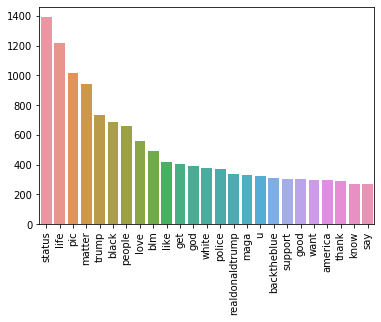

In [78]:
#plotting the graph
sns.barplot(pos_bar_words, pos_bar_counts)
plt.xticks(rotation=90)

In [79]:
#creating the x and y for our top 25 words graph neu sentiment
neu_bar_counts = [x[1] for x in neu_words_list.most_common(25)]
neu_bar_words = [x[0] for x in neu_words_list.most_common(25)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

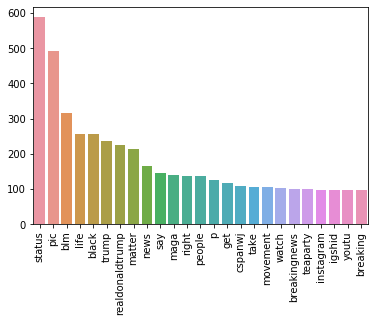

In [80]:
#plotting the graph
sns.barplot(neu_bar_words, neu_bar_counts)
plt.xticks(rotation=90)

In [83]:
#creating the x and y for our top 25 words graph neg sentiment
neg_bar_counts = [x[1] for x in neg_words_list.most_common(25)]
neg_bar_words = [x[0] for x in neg_words_list.most_common(25)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

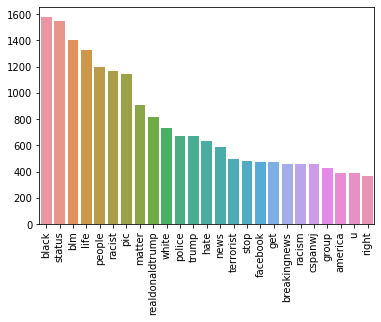

In [84]:
#plotting the graph 
sns.barplot(neg_bar_words, neg_bar_counts)
plt.xticks(rotation=90)

In [85]:
#importing wordcloud and making the dictionary for pos, neu, neg
from wordcloud import WordCloud
pos_dictionary = dict(zip(pos_bar_words, pos_bar_counts))
neu_dictionary = dict(zip(neu_bar_words, neu_bar_counts))
neg_dictionary = dict(zip(neg_bar_words, neg_bar_counts))

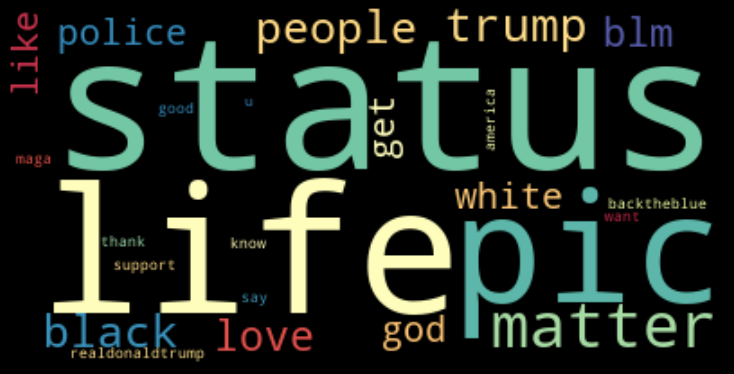

In [93]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(pos_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

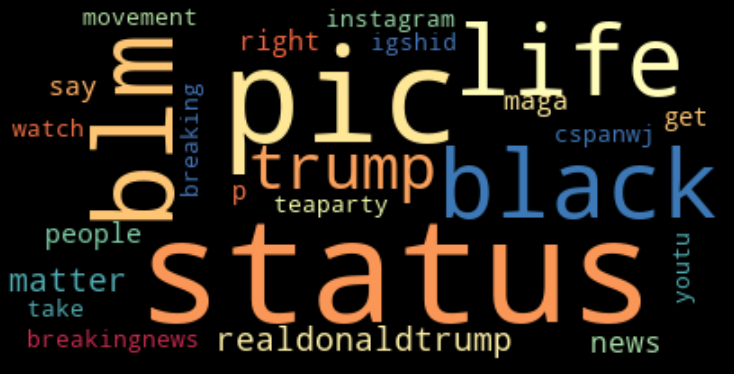

In [87]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neu_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

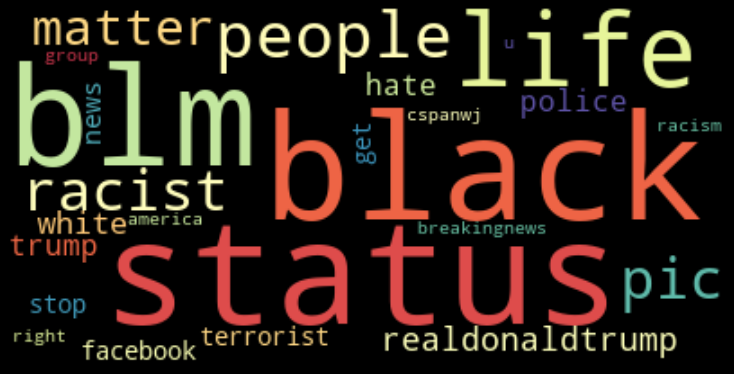

In [88]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neg_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()